In [1]:
import os, sys
root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)

In [2]:
from e_nose import file_reader 
from e_nose import data_processing as dp
from e_nose import data_visualization
from e_nose.measurements import Measurement, StandardizationType
from e_nose.online_reader import OnlineReader, FileAsOnlineReader
import numpy as np

%reload_ext autoreload
%autoreload 2

In [3]:
data_tuple = file_reader.read_all_files_in_folder('../../../data/Final')
functionalisations, working_channels, all_data = data_tuple
data = next(iter(all_data.values()))

Reading file ../../../data/Final/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19-2.csv
using sensor 5 specification
Reading file ../../../data/Final/data_raisin_acetone_orange_juice_pinot_noir_isopropanol_wodka_20_loops_for_2.0_min_referenceTime_2.0_min_2020-3-8_15_19.csv
using sensor 5 specification
Read 2 files


In [4]:
measurements_normal = dp.get_labeled_measurements(data, working_channels,
                                                              functionalisations, start_offset=0)
measurements_normal = dp.standardize_measurements(measurements_normal, StandardizationType.LAST_REFERENCE, remove_ref=True)

In [5]:
reader = FileAsOnlineReader(5, data, StandardizationType.LAST_REFERENCE)

using sensor 5 specification


In [6]:
measurements = reader.get_all_measurements_every(136, 67, initial_offset=0)

Normal 0: isopropanol


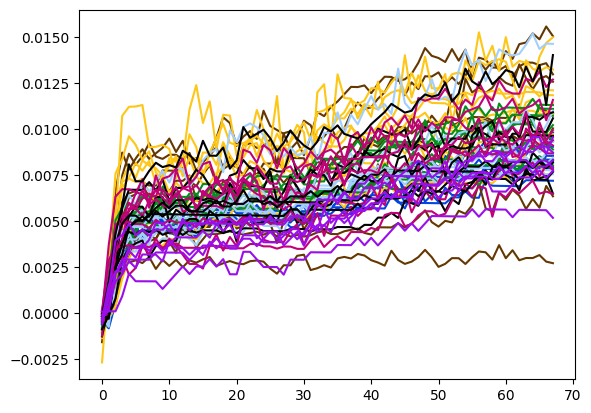

OnlineReader 0: ref


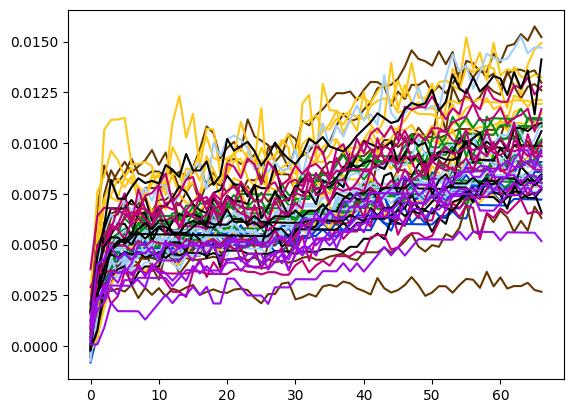

Normal 1: pinot_noir


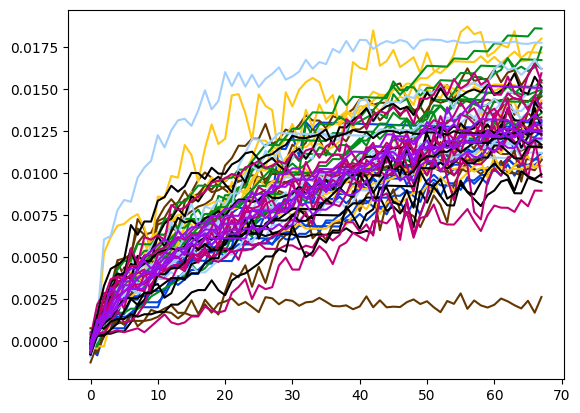

OnlineReader 1: ref


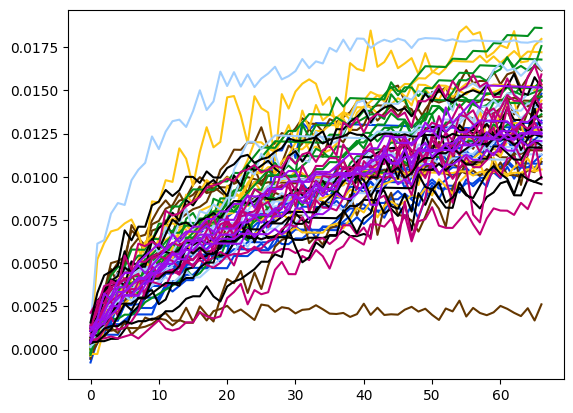

Normal 2: pinot_noir


KeyboardInterrupt: 

In [7]:
for i, m in enumerate(measurements):
    m2 = measurements_normal[i]
    
    print("Normal %i: %s" % (i,m2.label))
    data_visualization.draw_meas_channel_over_time(m2, functionalisations)
    
    print("OnlineReader %i: %s" % (i,m.label))
    data_visualization.draw_meas_channel_over_time(m, functionalisations)